<a href="https://colab.research.google.com/github/dmdwn99/Computer-Vision-Study/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. 분류

분류는 데이터가 어느 범주에 해당하는지 판단하는 데이터 분석 방법이다. 

# 5.1 이항 분류

이항 분류는 범주가 두 개인 데이터를 분류하는 것이다. 이항 분류에 대한 이해를 위해 와인 데이터셋을 사용했다. pandas를 사용해 데이터 프레임으로 데이터셋을 불러왔다. 

In [56]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

와인의 종류를 분류하기 위해 와인이 레드 와인인지, 화이트 와인인지 표시해주는 column을 추가했고, pandas의 concat 함수를 이용해 레드 와인과 화이트 와인 데이터를 합쳤다. concat의 파라미터 중 axis 설정 값에 따라 row, column 중 하나를 기준으로 하여 데이터를 합친다. describe 함수는 통계적 특성을 볼 수 있는 pandas의 함수이다.

In [57]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red,white],axis=0)
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

type column의 평균을 보면 약 0.75의 값을 보인다. 이는 레드 와인보다 화이트와인이 더 많다는 것을 알 수 있다. 책에서는 matplotlib를 사용해 type 데이터의 분포를 확인하였는데 pandas의 hist 함수도 동일한 결과를 볼 수 있다. 또한 정확한 수치를 알아보기 위해 value_count 함수를 사용해 각 값의 수를 확인했다. 

1    4898
0    1599
Name: type, dtype: int64


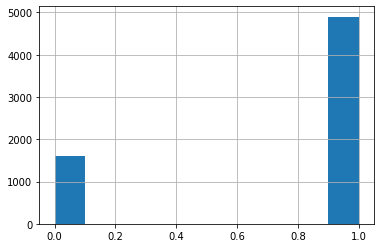

In [24]:
wine['type'].hist()
print(wine['type'].value_counts())

info 함수를 통해 각 column 별 null 데이터나 dtype을 통해 이상한 값이 들어있는지 확인할 수 있다.

In [25]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


데이터의 정규화를 위해 각 값과 최솟값의 차를 최댓값과 최솟값의 차로 나누었다. describe 함수를 통해 각 column의 min은 0, max는 1인 것을 확인할 수 있다.

In [58]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

정렬된 데이터를 train, test로 분류하기위 랜덤하게 섞은 후 ndarray로 변환했다. sample 함수는 pandas 데이터 구조에서 랜덤하게 값을 추출한다. 파라미터 frac을 통해 추출할 비율을 결정하는데 1 이하의 값으로 설정한다. to_numpy를 이용해 ndarrat로 변환했다.

In [59]:
import numpy as np
wine_suffle = wine_norm.sample(frac=1)
print(wine_suffle.head())
wine_np = wine_suffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
901        0.347107          0.140000     0.174699        0.193252   0.061462   
3838       0.223140          0.220000     0.132530        0.064417   0.071429   
137        0.280992          0.223333     0.216867        0.021472   0.119601   
995        0.330579          0.126667     0.204819        0.015337   0.061462   
543        0.611570          0.386667     0.144578        0.029141   0.126246   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
901              0.086806              0.246544  0.215732  0.410853   
3838             0.166667              0.313364  0.144399  0.325581   
137              0.041667              0.089862  0.194525  0.589147   
995              0.090278              0.341014  0.107769  0.255814   
543              0.052083              0.108295  0.235011  0.263566   

      sulphates   alcohol   quality  type  
901    0.084270  0.246377  0.500000   1.0 

train, test 데이터를 8:2의 비율로 나누기 위해 데이터 길이의 0.8을 곱해 구분할 idx 값을 구했다. 2차원 데이터 슬라이싱이므로 , 를 이용해 row, column의 범위를 지정했다. x_train을 설명하자면 0부터 train_idx-1 까지의 row, 마지막을 제외한 column으로 데이터를 파싱했다. 

정답을 의미하는 y_train, y_test를 keras의 to_categorical 함수를 사용해 원 핫 인코딩 바꿨다. 원 핫 인코딩은 정답에 인덱스는 1, 나머지는 모두 0을 넣는 방식이다. 

In [30]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
x_train, y_train = wine_np[:train_idx,:-1], wine_np[:train_idx,-1]
x_test, y_test = wine_np[train_idx:,:-1], wine_np[train_idx:,-1]
print(x_train[0])
print(y_train[0])
print(x_test[0])
print(y_test[0])

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
print(y_train[0])
print(y_test[0])

[0.17355372 0.06666667 0.1686747  0.00613497 0.04651163 0.07986111
 0.18894009 0.07383844 0.44186047 0.18539326 0.38405797 0.66666667]
1.0
[0.45454545 0.28       0.21686747 0.01840491 0.12458472 0.01736111
 0.02534562 0.19144014 0.42635659 0.30898876 0.4057971  0.5       ]
0.0
[0. 1.]
[1. 0.]


분류 모델이므로 마지막 layer의 activation을 softmax로 설정했다. softmax는 출력값들을 자연로그의 밑인 e의 지수로 사용해 계산한 뒤 모두 더한 값으로 나눈다. 큰 값을 강조하고 작은 값은 약화하는 효과를 보인다. softmax는 확률이 필요한 다양한 분야에서 사용된다. 또한 마지막 layer의 뉴런의 개수가 2개로 설정되어 있다. 원 핫 인코딩으로 변환한 정답의 차원의 개수가 2개이기 때문이다.

In [37]:
import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 48,activation = 'relu', input_shape=(12,)),
  tf.keras.layers.Dense(units = 24,activation = 'relu'),
  tf.keras.layers.Dense(units = 12,activation = 'relu'),
  tf.keras.layers.Dense(units = 2, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.07),loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 48)                624       
                                                                 
 dense_5 (Dense)             (None, 24)                1176      
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


손실함수에 사용된 categorical_crossentropy에 설명에 앞서 엔트로피와 정보이론에 대해 간략히 요악해봤다. 정보이론에서 정보량을 나타내기 위해 사용되는 엔트로피는 불확실한 정보를 숫자로 정량화하는 도구다. 엔트로피는 확률의 역수의 로그를 취한 값이다. 역수를 취하는 이유는 확률이 높은 사건일수록 정보량이 적다고 판단하기 때문이다. 엔트로피가 높으면 불확실성이 높음을 의미하므로 엔트로피를 줄이면 불확실성이 낮아지고 의미 있는 정보를 얻을 수 있다.

위 설명을 참고하여 크로스 엔트로피는 실제 분포에 대해 알지 못하는 상황에서 모델링을 통해 구한 분포를 통하여 실제 분포를 예측하는 것이다. 크로스 엔트로피의 값도 손실과 같아 네트워크는 값을 낮추는 방향으로 학습한다. 

complie의 metric 인수에 추가된 accuracy는 정확도를 의미하며 모델의 학습 history에 loss와 함께 저장된다.

모델을 학습시키면 accuracy, val_accuracy를 확인할 수 있다. accuracy, val_accuracy 모두 1과 가까워져 매우 좋은 성능의 모델이 되었다.


In [38]:
history = model.fit(x_train,y_train,epochs=25,batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.1392 - accuracy: 0.9533 - val_loss: 0.0644 - val_accuracy: 0.9831
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9826 - val_loss: 0.0816 - val_accuracy: 0.9738
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9826 - val_loss: 0.0368 - val_accuracy: 0.9908
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9820 - val_loss: 0.0403 - val_accuracy: 0.9908
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9864 - val_loss: 0.0372 - val_accuracy: 0.9908
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0407 - val_accuracy: 0.9915
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9833 - val_loss: 0.0431 - val_accuracy: 0.9900
Epoch 

matplotlib를 이용하여 loss, accuracy를 시각화 하였다. accuracy, val_accuracy 모두 1과 가까워져 매우 좋은 결과를 확인할 수 있다.

<function matplotlib.pyplot.show>

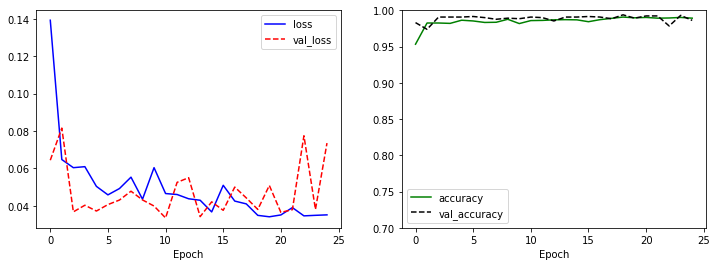

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show

test 데이터를 evaluate 함수를 이용하여 모델의 성능을 확인하였다. accuracy가 0.9792로 train 데이터 학습 결과보다는 조금 낮지만 거의 오차없이 와인을 분류함을 알 수 있다. 

In [41]:
model.evaluate(x_test,y_test)

41/41 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9792


[0.055414892733097076, 0.9792307615280151]

# 5.2 다항분류

이항 분류가 범주가 2개인 데이터를 분류하는 것이였다면, 다항 분류는 범주의 수가 2개 이상인 데이터를 분류하는 것이다. 다항 분류의 이해를 위해 기존 데이터인 wine의 quality column을 데이터셋으로 한다. 데이터는 3~9 사이의 값을 가지며 각 데이터의 분포를 확인했을 때 불균형하게 구성되어 있다.

In [60]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


pandas의 hist 함수를 이용해 데이터 분포의 불균형함을 시각화 할 수 있다. 

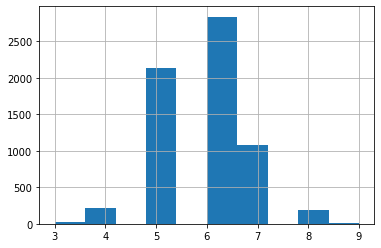

In [46]:
wine['quality'].hist()

데이터의 범주를 3 - 5를 0, 6을 1, 7 - 9를 2로 재분류하여 범주의 불균형을 해결했다. loc 함수는 pandas에서 제공되는 함수로 특정 데이터의 인덱스를 골라낸다. 괄호 안에 인수를 하나만 넣으면 행, ,를 포함한 두개의 인수를 넣으면 행, 열을 골라낼 수 있다. 재분류한 범주를 describe, value_counts 함수로 확인해보면 적절한 비율로 분포됨을 볼 수 있다.

In [61]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


quality column을 재분류 했으므로 삭제해주고 이항 분류에서 데이터를 전처리하고 train 데이터와 test 데이터를 분리했던 과정을 그대로 실행한다. new_quality column이 마지막에 추가되었기에 정상적으로 분리된다. 또한 y_train, y_test의 범주가 3개 이므로 num_classes의 값을 3으로 설정했다.

In [62]:
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_suffle = wine_norm.sample(frac=1)
wine_np = wine_suffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
x_train, y_train = wine_np[:train_idx,:-1], wine_np[:train_idx,-1]
x_test, y_test = wine_np[train_idx:,:-1], wine_np[train_idx:,-1]

y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

모델도 이항 분류와 동일하게 생성하였는데 차이점은 마지막 layer 뉴런의 수를 범주의 개수인 3으로 설정한 것이다. accuracy는 이항 분류보다 낮은 약 0.79의 값을 보인다. 

In [63]:
import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 48,activation = 'relu', input_shape=(12,)),
  tf.keras.layers.Dense(units = 24,activation = 'relu'),
  tf.keras.layers.Dense(units = 12,activation = 'relu'),
  tf.keras.layers.Dense(units = 3, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.07),loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=25,batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.5085 - accuracy: 0.7844 - val_loss: 0.5023 - val_accuracy: 0.8054
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.7945 - val_loss: 0.4564 - val_accuracy: 0.8054
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.7955 - val_loss: 0.4075 - val_accuracy: 0.8054
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.7934 - val_loss: 0.4023 - val_accuracy: 0.8054
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.7970 - val_loss: 0.4328 - val_accuracy: 0.8054
Epoch 6/25
122/122 [==============================] - 1s 7ms/step - loss: 0.4263 - accuracy: 0.8004 - val_loss: 0.4357 - val_accuracy: 0.7792
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.7939 - val_loss: 0.4103 - val_accuracy: 0.8054
Epoch 

이항 분류 그래프와 그래프를 비교해보면 성능의 차이가 확실하게 느껴진다. 특히 val loss가 중간중간 튀는것을 보아 정답을 찾기 어려운 문제임을 알 수 있다.

<function matplotlib.pyplot.show>

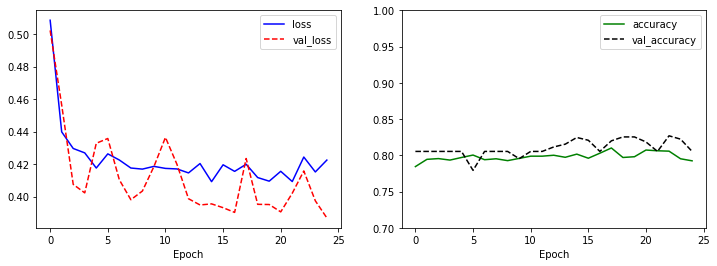

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show

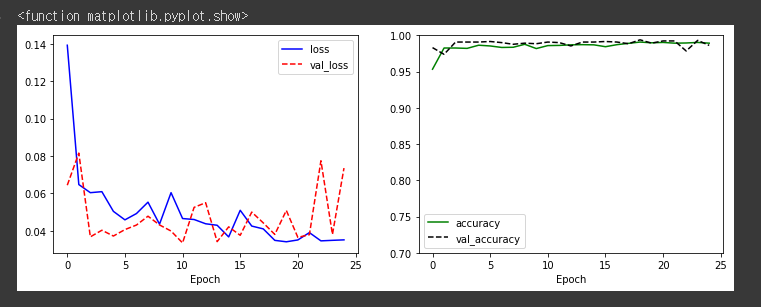

test 데이터를 이용한 evaluate 결과는 train 데이터의 accuracy보다 조금 높은 약 0.81을 보인다. 데이터의 구성을 임의로 변경했기에 좋은 성과가 나오기 어렵다.

In [65]:
model.evaluate(x_test,y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8162


[0.38487380743026733, 0.8161538243293762]

# 5.3 Fashion MNIST

Fashion MNIST 데이터는 옷, 신발, 가방의 이미지로 구성되어 있다. 그레이스케일, 즉 이미지의 밝기 정보만 남긴 회색 이미지, 범주의 수는 10개, 이미지 픽셀은 28*28로 되어 있다. train 데이터는 60000개, test 데이터는 10000개의 이미지를 포함한다.

In [75]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(len(x_train),len(x_test))

60000 10000


imshow 함수는 이미지를 그래프 형태로 표현할 수 있다. 파라미터 cmap을 gray로 설정해 그레이스케일 이미지로 표현했다. colorbar 함수는 색상의 값의 정보를 막대기 형태로 표시한다. 데이터의 이미지가 0 ~ 255의 값을 가지며 28 * 28 픽셀임을 확인할 수 있다.

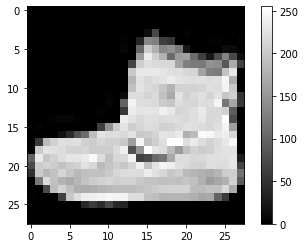

9


In [76]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')
plt.colorbar()
plt.show()

print(y_train[0])

데이터 정규화를 위해 데이터를 255로 나눠 0과 1사이의 값으로 변환했다. 정상적으로 되었는지 print 해서 확인했는데, github에서 코드가 너무 길어져서 주석처리했다.

In [77]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#|print(x_train[0])

현재 y_train, y_test 데이터를 원 핫 인코딩으로 변경하게 되면 9는 [0,0,0,0,0,0,0,0,0,1], 4는 [0,0,0,0,1,0,0,0,0,0]이 된다. 이렇게 대부분의 값이 0으로 구성된 행렬을 희소행렬이라고 하는데 0의 개수가 많으면 메모리를 많이 차지하므로 범주의 개수가 많을 때는 굳이 원 핫 인코딩을 할 필요가 없다.

이미 분류 모델은 각 범주의 확률이 1차원 배열로 나와야 한다. 모델 생성 시 사용된 Flatten은 2차원 이상의 배열을 1차원 배열로 만들어준다. 데이터의 범주의 개수가 10이므로 마지막 layer의 뉴런의 수를 10으로 설정했다.

coplie 함수의 loss에 sparse_categorical_crossentropy가 사용되었는데 이 것을 사용하면 별도의 데이터 전처리 없이 희소 행렬을 나타내는 데이터를 정답 행렬로 사용할 수 있다. optimizer Adam의 learnig rate도 앞선 모델들과 달리 default로 설정했는데 이는 0.001로 설정된다.

In [78]:
import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(units = 128,activation = 'relu'),
  tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


학습 결과를 보면 accuracy는 계속 증가하지만 val_accuracy는 일정한 수준으로 유지되는 것을 볼 수 있다.

In [83]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2051 - accuracy: 0.9229 - val_loss: 0.3264 - val_accuracy: 0.8919
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2000 - accuracy: 0.9254 - val_loss: 0.3279 - val_accuracy: 0.8920
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1930 - accuracy: 0.9272 - val_loss: 0.3304 - val_accuracy: 0.8916
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1866 - accuracy: 0.9308 - val_loss: 0.3473 - val_accuracy: 0.8867
Epoch 5/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1820 - accuracy: 0.9324 - val_loss: 0.3367 - val_accuracy: 0.8913
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1764 - accuracy: 0.9344 - val_loss: 0.3403 - val_accuracy: 0.8877
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1707 - accuracy: 0.9361 - val_loss: 0.3346 - val_accuracy:

loss와 accuarcy의 변화를 시각화하여 보면 val_loss가 불안정하게 증가추세를 보이므로 과적합되고 있음을 보인다.

<function matplotlib.pyplot.show>

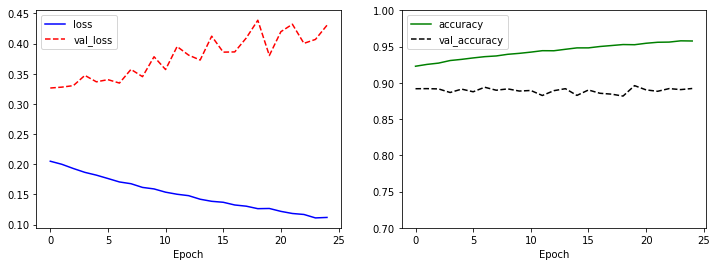

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show

evaluate 함수를 test 데이터를 인자로 하여 성능을 확인해보니 약 0.88의 정확도를 보였다.

In [85]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4806 - accuracy: 0.8859


[0.4806158244609833, 0.8859000205993652]

앞선 4장에서 나왔던 콜백함수를 사용해 모델을 다시 학습해봤다. epochs 17에서 모델 학습이 종료되었다.

In [86]:
import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(units = 128,activation = 'relu'),
  tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=25,validation_split=0.25,
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5278 - accuracy: 0.8147 - val_loss: 0.4719 - val_accuracy: 0.8308
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3908 - accuracy: 0.8604 - val_loss: 0.3830 - val_accuracy: 0.8599
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3515 - accuracy: 0.8716 - val_loss: 0.3665 - val_accuracy: 0.8685
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3237 - accuracy: 0.8802 - val_loss: 0.3357 - val_accuracy: 0.8771
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3020 - accuracy: 0.8898 - val_loss: 0.3356 - val_accuracy: 0.8779
Epoch 6/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2874 - accuracy: 0.8950 - val_loss: 0.3295 - val_accuracy: 0.8808
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2746 - accuracy: 0.8981 - val_loss: 0.3380 - val_accuracy:

콜백 함수를 사용한 모델의 성능을 evaluate로 평가해봤는데 오히려 낮은 성능을 보였다. 다시 한번 느낀다. 운빨x망겜,,,,

다음 장에서 이 운빨x망겜에 성능을 보장해주는 CNN에 대해 공부한다고 한다.

In [87]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8780


[0.36724311113357544, 0.878000020980835]